![alt 属性文本](https://imgs.xkcd.com/comics/machine_learning_2x.png "可选标题")

# DataFreame载入及空值填充

In [1]:
import os
import pandas as pd
import numpy as np


df = pd.read_csv(
    "https://data.heatonresearch.com/data/t81-558/auto-mpg.csv", 
    na_values=['NA', '?'])
print(f"horsepower has na? {pd.isnull(df['horsepower']).values.any()}")
    
print("Filling missing values...")
med = df['horsepower'].median()
df['horsepower'] = df['horsepower'].fillna(med)
                
print(f"horsepower has na? {pd.isnull(df['horsepower']).values.any()}")
display(df)

horsepower has na? True
Filling missing values...
horsepower has na? False


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


# 特征直方图


<Figure size 432x288 with 0 Axes>

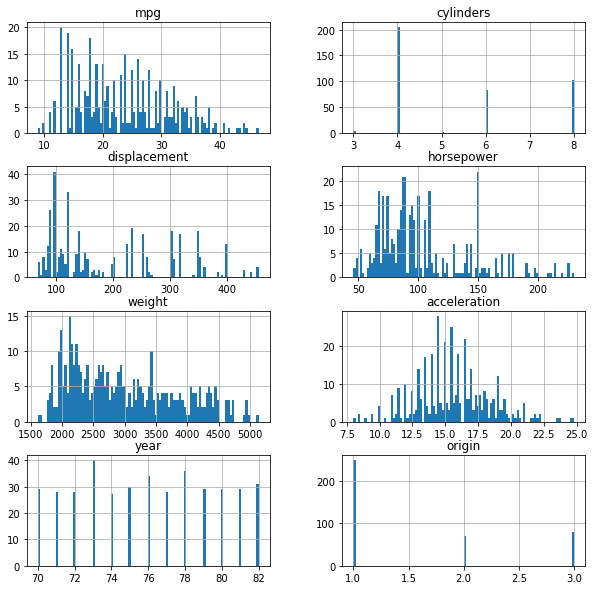

<Figure size 432x288 with 0 Axes>

In [2]:
import matplotlib.pyplot as plt

df.hist(bins=100,figsize=[10,10], layout=[4,2])
plt.figure()

# 特征归一化示例
### weight特征
#### zscore
#### minimax
#### percentile

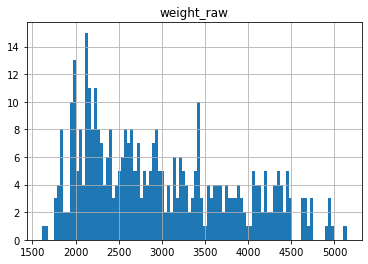

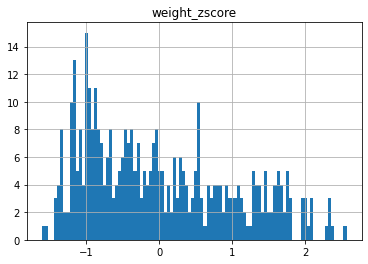

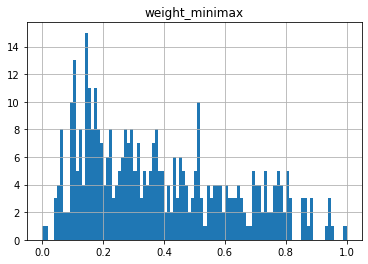

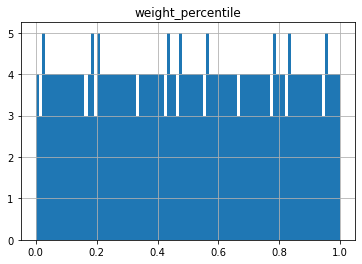

<Figure size 432x288 with 0 Axes>

In [41]:

import pandas as pd
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

plt.title("weight_raw")
df['weight'].hist(bins=100)
plt.figure()

df['weight_zscore'] = zscore(df['weight'])
plt.title("weight_zscore")
df['weight_zscore'].hist(bins=100)
plt.figure()
df.drop('weight_zscore', axis=1, inplace=True)

scaler = MinMaxScaler()
df['weight_minimax']=scaler.fit_transform(df['weight'].values.reshape(-1,1))
plt.title("weight_minimax")
df['weight_minimax'].hist(bins=100)
plt.figure()
df.drop('weight_minimax', axis=1, inplace=True)

def percentile(df,column):
    sz = df[column].size-1
    df[column+'_percentile'] = df[column].rank(method='max').apply(lambda x: (x-1)/sz)

percentile(df,'weight')
plt.title("weight_percentile")
df['weight_percentile'].hist(bins=100)
plt.figure()
df.drop('weight_percentile', axis=1, inplace=True)



# 分位数归一化线性特征

In [4]:
percentile(df,'weight')
percentile(df,'cylinders')
percentile(df,'displacement')
percentile(df,'horsepower')
percentile(df,'acceleration')
percentile(df,'year')

display(df)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,weight_percentile,cylinders_percentile,displacement_percentile,horsepower_percentile,acceleration_percentile,year_percentile
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,0.727960,1.000000,0.816121,0.770781,0.100756,0.070529
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,0.775819,1.000000,0.906801,0.916877,0.073048,0.070529
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,0.712846,1.000000,0.858942,0.886650,0.042821,0.070529
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,0.710327,1.000000,0.798489,0.886650,0.100756,0.070529
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,0.720403,1.000000,0.780856,0.806045,0.025189,0.070529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl,0.493703,0.521411,0.481108,0.365239,0.539043,1.000000
394,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup,0.186398,0.521411,0.193955,0.022670,0.997481,1.000000
395,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage,0.292191,0.521411,0.440806,0.329975,0.075567,1.000000
396,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger,0.423174,0.521411,0.367758,0.279597,0.866499,1.000000


# 独热编码非线性特征
### origin字段 独热编码
### name字段 对首单词独热编码

In [5]:
from sklearn import metrics
from scipy.stats import zscore


def get_first_word(x):
    words = x.split()
    return words[0]

dummies = pd.get_dummies(df['origin'],prefix='origin')
df = pd.concat([df,dummies],axis=1)
df.drop('origin',axis=1, inplace=True)
display(df)


df['name']=df['name'].apply(get_first_word)
dummies = pd.get_dummies(df['name'],prefix='name')
df = pd.concat([df,dummies],axis=1)
df.drop('name',axis=1, inplace=True)
display(df)


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,name,weight_percentile,cylinders_percentile,displacement_percentile,horsepower_percentile,acceleration_percentile,year_percentile,origin_1,origin_2,origin_3
0,18.0,8,307.0,130.0,3504,12.0,70,chevrolet chevelle malibu,0.727960,1.000000,0.816121,0.770781,0.100756,0.070529,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,buick skylark 320,0.775819,1.000000,0.906801,0.916877,0.073048,0.070529,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,plymouth satellite,0.712846,1.000000,0.858942,0.886650,0.042821,0.070529,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,amc rebel sst,0.710327,1.000000,0.798489,0.886650,0.100756,0.070529,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,ford torino,0.720403,1.000000,0.780856,0.806045,0.025189,0.070529,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,ford mustang gl,0.493703,0.521411,0.481108,0.365239,0.539043,1.000000,1,0,0
394,44.0,4,97.0,52.0,2130,24.6,82,vw pickup,0.186398,0.521411,0.193955,0.022670,0.997481,1.000000,0,1,0
395,32.0,4,135.0,84.0,2295,11.6,82,dodge rampage,0.292191,0.521411,0.440806,0.329975,0.075567,1.000000,1,0,0
396,28.0,4,120.0,79.0,2625,18.6,82,ford ranger,0.423174,0.521411,0.367758,0.279597,0.866499,1.000000,1,0,0


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,weight_percentile,cylinders_percentile,displacement_percentile,...,name_renault,name_saab,name_subaru,name_toyota,name_toyouta,name_triumph,name_vokswagen,name_volkswagen,name_volvo,name_vw
0,18.0,8,307.0,130.0,3504,12.0,70,0.727960,1.000000,0.816121,...,0,0,0,0,0,0,0,0,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,0.775819,1.000000,0.906801,...,0,0,0,0,0,0,0,0,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,0.712846,1.000000,0.858942,...,0,0,0,0,0,0,0,0,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,0.710327,1.000000,0.798489,...,0,0,0,0,0,0,0,0,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,0.720403,1.000000,0.780856,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,0.493703,0.521411,0.481108,...,0,0,0,0,0,0,0,0,0,0
394,44.0,4,97.0,52.0,2130,24.6,82,0.186398,0.521411,0.193955,...,0,0,0,0,0,0,0,0,0,1
395,32.0,4,135.0,84.0,2295,11.6,82,0.292191,0.521411,0.440806,...,0,0,0,0,0,0,0,0,0,0
396,28.0,4,120.0,79.0,2625,18.6,82,0.423174,0.521411,0.367758,...,0,0,0,0,0,0,0,0,0,0


# mpg作为label 其他作为特征

In [6]:

x=df.drop('mpg',axis=1)
print("x.shape=",x.shape)

y=df['mpg']
print("y.shape=",y.shape)

feature_ratings = pd.DataFrame(columns=x.columns)



x.shape= (398, 52)
y.shape= (398,)


# KBest特征评分
## f_regression
    F-value between label/feature for regression tasks
## mutual_info_regression
    Mutual information for a continuous target.
## f_classif
    ANOVA F-value between label/feature for classification tasks.


In [7]:

from sklearn.feature_selection import SelectKBest, chi2,f_regression,mutual_info_regression,f_classif

fr = SelectKBest(f_regression,k='all').fit(x, y)
mir = SelectKBest(mutual_info_regression,k='all').fit(x, y)
f_classif = SelectKBest(f_classif,k='all').fit(x, y)

feature_ratings.loc['fr_score'] = fr.scores_
feature_ratings.loc['mir_score'] = mir.scores_
feature_ratings.loc['f_classif_score'] = f_classif.scores_

display(feature_ratings)

/Users/thomashuang/opt/miniconda3/envs/tensorflow/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


,cylinders,displacement,horsepower,weight,acceleration,year,weight_percentile,cylinders_percentile,displacement_percentile,horsepower_percentile,...,name_renault,name_saab,name_subaru,name_toyota,name_toyouta,name_triumph,name_vokswagen,name_volkswagen,name_volvo,name_vw
fr_score,597.077048,724.994303,589.638205,888.850683,84.957700,199.982008,1003.401172,452.007853,871.017555,868.717795,...,7.387202,0.009801,3.269217,10.550760,0.004334,2.171195,0.647753,8.122307,0.572767,25.439362
mir_score,0.597324,0.789164,0.726976,0.784001,0.193392,0.336438,0.765649,0.596843,0.810934,0.708815,...,0.013041,0.000000,0.012437,0.021598,0.000000,0.003623,0.000000,0.012242,0.016462,0.025691
f_classif_score,12.140920,12.960087,8.934822,14.871390,1.946966,3.713601,13.710749,8.820703,11.134832,10.197685,...,1.191514,1.167702,2.558626,1.436349,0.227640,2.091002,2.091002,0.799921,0.655904,12.091905


# RFE 迭代式的特征淘汰 (Recursive Feature Elimination)

### SVR
    Epsilon-Support Vector Regression.
### NuSVR
    Nu Support Vector Regression.

In [8]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR, NuSVR

estimator_svr = SVR(kernel="linear")
selector_svr = RFE(estimator_svr, n_features_to_select=0.1, step=0.1)
rfe_svr = selector_svr.fit(x, y)
print(rfe_svr.support_)
print(rfe_svr.ranking_)

estimator_nusvr = NuSVR(kernel="linear")
selector_nusvr = RFE(estimator_nusvr, n_features_to_select=0.1, step=0.1)
rfe_nusvr = selector_nusvr.fit(x, y)
print(rfe_nusvr.support_)
print(rfe_nusvr.ranking_)


feature_ratings.loc['rfe_svr_ranking'] = rfe_svr.ranking_
feature_ratings.loc['rfe_nusvr_ranking'] = rfe_nusvr.ranking_
display(feature_ratings)

[False False False False False False  True False  True  True False False
 False False False False False False False False False False False False
 False  True False False False False False False False False False False
 False False False False False False False False False False False False
 False False False  True]
[ 6 10  9 10  8  5  1  5  1  1  3  7  4  8  7  7  4  9  7 11  8  6  8  6
  9  1 11  5  5  9  2 10  8  4 11  3  3  6 10 10  6  3  3 11  9  5  7  4
  4  2 11  1]
[False False False False False False  True  True  True  True False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False  True False False]
[ 5  9  9  9  6  5  1  1  1  1  2  6  4  6  5  6 11 11  8  3  8  8  7  8
  5  3  7  8  5 11 11  4 10  7  7  9 10  9  3 10  4  3  4 10  6  7 11 10
  4  1  3  2]


,cylinders,displacement,horsepower,weight,acceleration,year,weight_percentile,cylinders_percentile,displacement_percentile,horsepower_percentile,...,name_renault,name_saab,name_subaru,name_toyota,name_toyouta,name_triumph,name_vokswagen,name_volkswagen,name_volvo,name_vw
fr_score,597.077048,724.994303,589.638205,888.850683,84.957700,199.982008,1003.401172,452.007853,871.017555,868.717795,...,7.387202,0.009801,3.269217,10.550760,0.004334,2.171195,0.647753,8.122307,0.572767,25.439362
mir_score,0.597324,0.789164,0.726976,0.784001,0.193392,0.336438,0.765649,0.596843,0.810934,0.708815,...,0.013041,0.000000,0.012437,0.021598,0.000000,0.003623,0.000000,0.012242,0.016462,0.025691
f_classif_score,12.140920,12.960087,8.934822,14.871390,1.946966,3.713601,13.710749,8.820703,11.134832,10.197685,...,1.191514,1.167702,2.558626,1.436349,0.227640,2.091002,2.091002,0.799921,0.655904,12.091905
rfe_svr_ranking,6.000000,10.000000,9.000000,10.000000,8.000000,5.000000,1.000000,5.000000,1.000000,1.000000,...,3.000000,11.000000,9.000000,5.000000,7.000000,4.000000,4.000000,2.000000,11.000000,1.000000
rfe_nusvr_ranking,5.000000,9.000000,9.000000,9.000000,6.000000,5.000000,1.000000,1.000000,1.000000,1.000000,...,4.000000,10.000000,6.000000,7.000000,11.000000,10.000000,4.000000,1.000000,3.000000,2.000000


# 使用模型对特征评分
### LinearRegression
    特征的相关性 coef
### AdaBoostRegressor
    特征重要性 feature_importance
### RandomForestRegressor
    特征重要性 feature_importance
### GradientBoostingRegressor
    特征重要性 feature_importance

In [9]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

selector_model_lr = SelectFromModel(estimator=LinearRegression()).fit(x, y)
selector_model_ada_boost = SelectFromModel(estimator=AdaBoostRegressor()).fit(x, y)
selector_model_random_forest = SelectFromModel(estimator=RandomForestRegressor()).fit(x, y)
selector_model_brandient_boost = SelectFromModel(estimator=GradientBoostingRegressor()).fit(x, y)

feature_ratings.loc['select_model_lr_coef'] = selector_model_lr.estimator_.coef_
feature_ratings.loc['selector_model_ada_boost'] = selector_model_ada_boost.estimator_.feature_importances_
feature_ratings.loc['selector_model_random_forest'] = selector_model_random_forest.estimator_.feature_importances_
feature_ratings.loc['selector_model_brandient_boost'] = selector_model_brandient_boost.estimator_.feature_importances_

display(feature_ratings)

,cylinders,displacement,horsepower,weight,acceleration,year,weight_percentile,cylinders_percentile,displacement_percentile,horsepower_percentile,...,name_renault,name_saab,name_subaru,name_toyota,name_toyouta,name_triumph,name_vokswagen,name_volkswagen,name_volvo,name_vw
fr_score,597.077048,724.994303,589.638205,888.850683,84.957700,199.982008,1003.401172,452.007853,871.017555,868.717795,...,7.387202,0.009801,3.269217,10.550760,0.004334,2.171195,0.647753,8.122307,0.572767,25.439362
mir_score,0.597324,0.789164,0.726976,0.784001,0.193392,0.336438,0.765649,0.596843,0.810934,0.708815,...,0.013041,0.000000,0.012437,0.021598,0.000000,0.003623,0.000000,0.012242,0.016462,0.025691
f_classif_score,12.140920,12.960087,8.934822,14.871390,1.946966,3.713601,13.710749,8.820703,11.134832,10.197685,...,1.191514,1.167702,2.558626,1.436349,0.227640,2.091002,2.091002,0.799921,0.655904,12.091905
rfe_svr_ranking,6.000000,10.000000,9.000000,10.000000,8.000000,5.000000,1.000000,5.000000,1.000000,1.000000,...,3.000000,11.000000,9.000000,5.000000,7.000000,4.000000,4.000000,2.000000,11.000000,1.000000
rfe_nusvr_ranking,5.000000,9.000000,9.000000,9.000000,6.000000,5.000000,1.000000,1.000000,1.000000,1.000000,...,4.000000,10.000000,6.000000,7.000000,11.000000,10.000000,4.000000,1.000000,3.000000,2.000000
select_model_lr_coef,-2.288612,0.022203,0.004973,-0.000855,0.195220,6.236638,-10.609413,16.333266,-6.105547,-8.367801,...,1.098538,1.404850,-1.290361,-0.280654,-0.541447,5.206797,-8.187099,-3.077183,-1.065067,3.740120
selector_model_ada_boost,0.029135,0.080829,0.091820,0.147942,0.012300,0.116735,0.173792,0.000939,0.063972,0.104751,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008654,0.000000,0.000000,0.009194
selector_model_random_forest,0.072856,0.155053,0.057285,0.104488,0.012336,0.059807,0.116818,0.089662,0.189040,0.043730,...,0.000462,0.000097,0.000126,0.000714,0.000029,0.000149,0.000892,0.000672,0.000287,0.002249
selector_model_brandient_boost,0.002446,0.028773,0.048065,0.174166,0.006984,0.063046,0.199121,0.170597,0.159426,0.033869,...,0.000192,0.000090,0.000319,0.000000,0.000000,0.000547,0.001663,0.000503,0.000138,0.002618


# 特征评分归一化(未完成)

In [10]:
def percentile_row(df,index,ascending=True):
    sz = df.loc[index].size-1
    df.loc[index+'_percentile'] = df.loc[index].rank(method='average',ascending=ascending).apply(lambda x: 100*(x-1)/sz)

percentile_row(feature_ratings,'fr_score')
percentile_row(feature_ratings,'mir_score')
percentile_row(feature_ratings,'f_classif_score')
percentile_row(feature_ratings,'rfe_svr_ranking',False)
percentile_row(feature_ratings,'rfe_nusvr_ranking',False)
percentile_row(feature_ratings,'select_model_lr_coef')
percentile_row(feature_ratings,'selector_model_ada_boost')
percentile_row(feature_ratings,'selector_model_random_forest')
percentile_row(feature_ratings,'selector_model_brandient_boost')

display(feature_ratings)


,cylinders,displacement,horsepower,weight,acceleration,year,weight_percentile,cylinders_percentile,displacement_percentile,horsepower_percentile,...,name_renault,name_saab,name_subaru,name_toyota,name_toyouta,name_triumph,name_vokswagen,name_volkswagen,name_volvo,name_vw
fr_score,597.077048,724.994303,589.638205,888.850683,84.957700,199.982008,1003.401172,452.007853,871.017555,868.717795,...,7.387202,0.009801,3.269217,10.550760,0.004334,2.171195,0.647753,8.122307,0.572767,25.439362
mir_score,0.597324,0.789164,0.726976,0.784001,0.193392,0.336438,0.765649,0.596843,0.810934,0.708815,...,0.013041,0.000000,0.012437,0.021598,0.000000,0.003623,0.000000,0.012242,0.016462,0.025691
f_classif_score,12.140920,12.960087,8.934822,14.871390,1.946966,3.713601,13.710749,8.820703,11.134832,10.197685,...,1.191514,1.167702,2.558626,1.436349,0.227640,2.091002,2.091002,0.799921,0.655904,12.091905
rfe_svr_ranking,6.000000,10.000000,9.000000,10.000000,8.000000,5.000000,1.000000,5.000000,1.000000,1.000000,...,3.000000,11.000000,9.000000,5.000000,7.000000,4.000000,4.000000,2.000000,11.000000,1.000000
rfe_nusvr_ranking,5.000000,9.000000,9.000000,9.000000,6.000000,5.000000,1.000000,1.000000,1.000000,1.000000,...,4.000000,10.000000,6.000000,7.000000,11.000000,10.000000,4.000000,1.000000,3.000000,2.000000
select_model_lr_coef,-2.288612,0.022203,0.004973,-0.000855,0.195220,6.236638,-10.609413,16.333266,-6.105547,-8.367801,...,1.098538,1.404850,-1.290361,-0.280654,-0.541447,5.206797,-8.187099,-3.077183,-1.065067,3.740120
selector_model_ada_boost,0.029135,0.080829,0.091820,0.147942,0.012300,0.116735,0.173792,0.000939,0.063972,0.104751,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008654,0.000000,0.000000,0.009194
selector_model_random_forest,0.072856,0.155053,0.057285,0.104488,0.012336,0.059807,0.116818,0.089662,0.189040,0.043730,...,0.000462,0.000097,0.000126,0.000714,0.000029,0.000149,0.000892,0.000672,0.000287,0.002249
selector_model_brandient_boost,0.002446,0.028773,0.048065,0.174166,0.006984,0.063046,0.199121,0.170597,0.159426,0.033869,...,0.000192,0.000090,0.000319,0.000000,0.000000,0.000547,0.001663,0.000503,0.000138,0.002618
fr_score_percentile,90.196078,92.156863,88.235294,98.039216,76.470588,84.313725,100.000000,86.274510,96.078431,94.117647,...,52.941176,7.843137,39.215686,60.784314,5.882353,35.294118,21.568627,56.862745,19.607843,70.588235


In [11]:
feature_ratings.drop('fr_score', axis=0, inplace=True)
feature_ratings.drop('mir_score', axis=0, inplace=True)
feature_ratings.drop('f_classif_score', axis=0, inplace=True)
feature_ratings.drop('rfe_svr_ranking', axis=0, inplace=True)
feature_ratings.drop('rfe_nusvr_ranking', axis=0, inplace=True)
feature_ratings.drop('select_model_lr_coef', axis=0, inplace=True)
feature_ratings.drop('selector_model_ada_boost', axis=0, inplace=True)
feature_ratings.drop('selector_model_random_forest', axis=0, inplace=True)
feature_ratings.drop('selector_model_brandient_boost', axis=0, inplace=True)

feature_ratings.drop('select_model_lr_coef_percentile', axis=0, inplace=True)
display(feature_ratings)

,cylinders,displacement,horsepower,weight,acceleration,year,weight_percentile,cylinders_percentile,displacement_percentile,horsepower_percentile,...,name_renault,name_saab,name_subaru,name_toyota,name_toyouta,name_triumph,name_vokswagen,name_volkswagen,name_volvo,name_vw
fr_score_percentile,90.196078,92.156863,88.235294,98.039216,76.470588,84.313725,100.000000,86.274510,96.078431,94.117647,...,52.941176,7.843137,39.215686,60.784314,5.882353,35.294118,21.568627,56.862745,19.607843,70.588235
mir_score_percentile,88.235294,98.039216,92.156863,96.078431,76.470588,84.313725,94.117647,86.274510,100.000000,90.196078,...,43.137255,13.725490,41.176471,60.784314,13.725490,31.372549,13.725490,39.215686,50.980392,64.705882
f_classif_score_percentile,92.156863,94.117647,84.313725,98.039216,54.901961,80.392157,96.078431,82.352941,88.235294,86.274510,...,47.058824,43.137255,72.549020,49.019608,5.882353,62.745098,62.745098,31.372549,23.529412,90.196078
rfe_svr_ranking_percentile,52.941176,13.725490,23.529412,13.725490,33.333333,62.745098,96.078431,62.745098,96.078431,96.078431,...,82.352941,3.921569,23.529412,62.745098,43.137255,72.549020,72.549020,89.215686,3.921569,96.078431
rfe_nusvr_ranking_percentile,62.745098,23.529412,23.529412,23.529412,52.941176,62.745098,96.078431,96.078431,96.078431,96.078431,...,72.549020,13.725490,52.941176,43.137255,3.921569,13.725490,72.549020,96.078431,82.352941,89.215686
selector_model_ada_boost_percentile,82.352941,88.235294,90.196078,98.039216,78.431373,96.078431,100.000000,66.666667,86.274510,94.117647,...,30.392157,30.392157,30.392157,30.392157,30.392157,30.392157,74.509804,30.392157,30.392157,76.470588
selector_model_random_forest_percentile,90.196078,98.039216,84.313725,94.117647,80.392157,86.274510,96.078431,92.156863,100.000000,82.352941,...,45.098039,19.607843,23.529412,54.901961,7.843137,27.450980,60.784314,49.019608,37.254902,72.549020
selector_model_brandient_boost_percentile,70.588235,84.313725,88.235294,98.039216,82.352941,90.196078,100.000000,96.078431,94.117647,86.274510,...,43.137255,31.372549,50.980392,11.764706,11.764706,58.823529,66.666667,56.862745,35.294118,76.470588


,cylinders,displacement,horsepower,weight,acceleration,year,weight_percentile,cylinders_percentile,displacement_percentile,horsepower_percentile,...,name_renault,name_saab,name_subaru,name_toyota,name_toyouta,name_triumph,name_vokswagen,name_volkswagen,name_volvo,name_vw
fr_score_percentile,90.196078,92.156863,88.235294,98.039216,76.470588,84.313725,100.000000,86.274510,96.078431,94.117647,...,52.941176,7.843137,39.215686,60.784314,5.882353,35.294118,21.568627,56.862745,19.607843,70.588235
mir_score_percentile,88.235294,98.039216,92.156863,96.078431,76.470588,84.313725,94.117647,86.274510,100.000000,90.196078,...,43.137255,13.725490,41.176471,60.784314,13.725490,31.372549,13.725490,39.215686,50.980392,64.705882
f_classif_score_percentile,92.156863,94.117647,84.313725,98.039216,54.901961,80.392157,96.078431,82.352941,88.235294,86.274510,...,47.058824,43.137255,72.549020,49.019608,5.882353,62.745098,62.745098,31.372549,23.529412,90.196078
rfe_svr_ranking_percentile,52.941176,13.725490,23.529412,13.725490,33.333333,62.745098,96.078431,62.745098,96.078431,96.078431,...,82.352941,3.921569,23.529412,62.745098,43.137255,72.549020,72.549020,89.215686,3.921569,96.078431
rfe_nusvr_ranking_percentile,62.745098,23.529412,23.529412,23.529412,52.941176,62.745098,96.078431,96.078431,96.078431,96.078431,...,72.549020,13.725490,52.941176,43.137255,3.921569,13.725490,72.549020,96.078431,82.352941,89.215686
selector_model_ada_boost_percentile,82.352941,88.235294,90.196078,98.039216,78.431373,96.078431,100.000000,66.666667,86.274510,94.117647,...,30.392157,30.392157,30.392157,30.392157,30.392157,30.392157,74.509804,30.392157,30.392157,76.470588
selector_model_random_forest_percentile,90.196078,98.039216,84.313725,94.117647,80.392157,86.274510,96.078431,92.156863,100.000000,82.352941,...,45.098039,19.607843,23.529412,54.901961,7.843137,27.450980,60.784314,49.019608,37.254902,72.549020
selector_model_brandient_boost_percentile,70.588235,84.313725,88.235294,98.039216,82.352941,90.196078,100.000000,96.078431,94.117647,86.274510,...,43.137255,31.372549,50.980392,11.764706,11.764706,58.823529,66.666667,56.862745,35.294118,76.470588
avg,78.676471,74.019608,71.813725,77.450980,66.911765,80.882353,97.303922,83.578431,94.607843,90.686275,...,52.083333,20.465686,41.789216,46.691176,15.318627,41.544118,55.637255,56.127451,35.416667,79.534314


<AxesSubplot:>

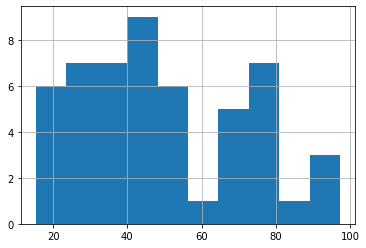

In [12]:
feature_ratings.loc['avg']=feature_ratings.mean(axis=0)
display(feature_ratings)
feature_ratings.loc['avg'].hist()

# 交叉验证-训练集/测试集划分

In [13]:
from sklearn.model_selection import train_test_split
# Convert to numpy - Classification
x_columns = df.columns.drop('mpg')
x = df[x_columns].values
y = df['mpg'].values
print("df.shape=",df.shape)
print("x.shape=",x.shape)
print("y.shape=",y.shape)
# Create train/test
x_train, x_test, y_train, y_test = train_test_split(    
    x, y, test_size=0.25, random_state=42)
print("x_train.shape=",x_train.shape)
print("x_test.shape=",x_test.shape)

df.shape= (398, 53)
x.shape= (398, 52)
y.shape= (398,)
x_train.shape= (298, 52)
x_test.shape= (100, 52)


# Tensorflow模型拟合
### 多层感知机 55-25-10-1 
### 激活函数 Relu
### 损失函数 MSE均方误差和
### 优化函数 adam
### EarlyStopping

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping

# Build the neural network
model = Sequential()
model.add(Dense(25, input_dim=x.shape[1], activation='relu')) # Hidden 1
model.add(Dense(10, activation='relu')) # Hidden 2
model.add(Dense(1)) # Output
model.compile(loss='mean_squared_error', optimizer='adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, 
                        patience=5, verbose=1, mode='auto', 
                        restore_best_weights=True)
model.fit(x_train,y_train,validation_data=(x_test,y_test),
          callbacks=[monitor],verbose=0,epochs=1000)

Restoring model weights from the end of the best epoch.
Epoch 00071: early stopping


# 测试集MSE

In [24]:
from sklearn import metrics

# Predict
pred = model.predict(x_test)

# Measure MSE error.  
score = metrics.mean_squared_error(pred,y_test)
print("Final score (MSE): {}".format(score))

Final score (MSE): 10.23565698127613


# 测试集RMSE

In [25]:
import numpy as np

# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(pred,y_test))
print("Final score (RMSE): {}".format(score))

Final score (RMSE): 3.1993213313570315


# Lift Chart

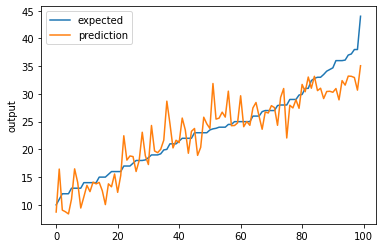

<Figure size 432x288 with 0 Axes>

In [26]:
# Regression chart.
def chart_regression(pred, y, sort=True):
    t = pd.DataFrame({'pred': pred, 'y': y.flatten()})
    if sort:
        t.sort_values(by=['y'], inplace=True)
    plt.plot(t['y'].tolist(), label='expected')
    plt.plot(t['pred'].tolist(), label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.figure()


# Plot the chart
chart_regression(pred.flatten(),y_test)

# 对比无特征工程的模型效果

horsepower has na? True
Filling missing values...
horsepower has na? False


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


df2.shape= (398, 9)
x2.shape= (398, 7)
y2.shape= (398,)
x2_train.shape= (298, 7)
x2_test.shape= (100, 7)
Restoring model weights from the end of the best epoch.
Epoch 00561: early stopping
Final score (MSE): 14.54824535601674
Final score (RMSE): 3.8142162177853445


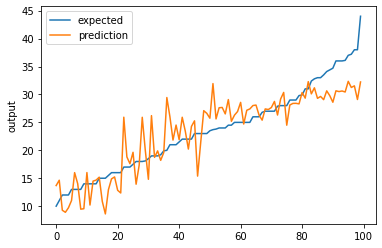

<Figure size 432x288 with 0 Axes>

In [18]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
import os
import pandas as pd
import numpy as np

df2 = pd.read_csv(
    "https://data.heatonresearch.com/data/t81-558/auto-mpg.csv", 
    na_values=['NA', '?'])
print(f"horsepower has na? {pd.isnull(df2['horsepower']).values.any()}")
    
print("Filling missing values...")
med = df2['horsepower'].median()
df2['horsepower'] = df2['horsepower'].fillna(med)
                
print(f"horsepower has na? {pd.isnull(df2['horsepower']).values.any()}")
display(df2)


# Convert to numpy - Classification
x2_columns = df2.columns.drop('mpg').drop('name')
x2 = df2[x2_columns].values
y2 = df2['mpg'].values
print("df2.shape=",df2.shape)
print("x2.shape=",x2.shape)
print("y2.shape=",y2.shape)
# Create train/test
x2_train, x2_test, y2_train, y2_test = train_test_split(    
    x2, y2, test_size=0.25, random_state=42)
print("x2_train.shape=",x2_train.shape)
print("x2_test.shape=",x2_test.shape)


# Build the neural network
model = Sequential()
model.add(Dense(25, input_dim=x2.shape[1], activation='relu')) # Hidden 1
model.add(Dense(10, activation='relu')) # Hidden 2
model.add(Dense(1)) # Output
model.compile(loss='mean_squared_error', optimizer='adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, 
                        patience=5, verbose=1, mode='auto', 
                        restore_best_weights=True)
model.fit(x2_train,y2_train,validation_data=(x2_test,y2_test),
          callbacks=[monitor],verbose=0,epochs=1000)

from sklearn import metrics

# Predict
pred2 = model.predict(x2_test)

# Measure MSE error.  
score = metrics.mean_squared_error(pred2,y2_test)
print("Final score (MSE): {}".format(score))

# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(pred2,y2_test))
print("Final score (RMSE): {}".format(score))

chart_regression(pred2.flatten(),y2_test)

# 对比带特征选择的模型效果

horsepower has na? True
Filling missing values...
horsepower has na? False


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


,mpg,weight_percentile,cylinders_percentile,displacement_percentile,horsepower_percentile,acceleration_percentile,year_percentile,origin_1,origin_2,origin_3
0,18.0,0.727960,1.000000,0.816121,0.770781,0.100756,0.070529,1,0,0
1,15.0,0.775819,1.000000,0.906801,0.916877,0.073048,0.070529,1,0,0
2,18.0,0.712846,1.000000,0.858942,0.886650,0.042821,0.070529,1,0,0
3,16.0,0.710327,1.000000,0.798489,0.886650,0.100756,0.070529,1,0,0
4,17.0,0.720403,1.000000,0.780856,0.806045,0.025189,0.070529,1,0,0
...,...,...,...,...,...,...,...,...,...,...
393,27.0,0.493703,0.521411,0.481108,0.365239,0.539043,1.000000,1,0,0
394,44.0,0.186398,0.521411,0.193955,0.022670,0.997481,1.000000,0,1,0
395,32.0,0.292191,0.521411,0.440806,0.329975,0.075567,1.000000,1,0,0
396,28.0,0.423174,0.521411,0.367758,0.279597,0.866499,1.000000,1,0,0


df3.shape= (398, 10)
x3.shape= (398, 9)
y3.shape= (398,)
x3_train.shape= (298, 9)
x3_test.shape= (100, 9)
Restoring model weights from the end of the best epoch.
Epoch 00204: early stopping
Final score (MSE): 6.886859094385329
Final score (RMSE): 2.624282586610163


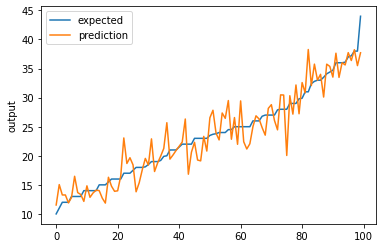

<Figure size 432x288 with 0 Axes>

In [19]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
import os
import pandas as pd
import numpy as np

df3 = pd.read_csv(
    "https://data.heatonresearch.com/data/t81-558/auto-mpg.csv", 
    na_values=['NA', '?'])
print(f"horsepower has na? {pd.isnull(df3['horsepower']).values.any()}")
    
print("Filling missing values...")
med = df3['horsepower'].median()
df3['horsepower'] = df3['horsepower'].fillna(med)
                
print(f"horsepower has na? {pd.isnull(df3['horsepower']).values.any()}")
display(df3)


def percentile(df,column):
    sz = df[column].size-1
    df[column+'_percentile'] = df[column].rank(method='max').apply(lambda x: (x-1)/sz)

percentile(df3,'weight')
df3.drop('weight',axis=1, inplace=True)
percentile(df3,'cylinders')
df3.drop('cylinders',axis=1, inplace=True)
percentile(df3,'displacement')
df3.drop('displacement',axis=1, inplace=True)
percentile(df3,'horsepower')
df3.drop('horsepower',axis=1, inplace=True)
percentile(df3,'acceleration')
df3.drop('acceleration',axis=1, inplace=True)
percentile(df3,'year')
df3.drop('year',axis=1, inplace=True)


dummies = pd.get_dummies(df3['origin'],prefix='origin')
df3 = pd.concat([df3,dummies],axis=1)
df3.drop('origin',axis=1, inplace=True)

# df3['name']=df3['name'].apply(get_first_word)
# dummies = pd.get_dummies(df3['name'],prefix='name')
# df3 = pd.concat([df3,dummies],axis=1)
df3.drop('name',axis=1, inplace=True)
display(df3)

# Convert to numpy - Classification
x3_columns = df3.columns.drop('mpg')
x3 = df3[x3_columns].values
y3 = df3['mpg'].values
print("df3.shape=",df3.shape)
print("x3.shape=",x3.shape)
print("y3.shape=",y3.shape)
# Create train/test
x3_train, x3_test, y3_train, y3_test = train_test_split(    
    x3, y3, test_size=0.25, random_state=42)
print("x3_train.shape=",x3_train.shape)
print("x3_test.shape=",x3_test.shape)


# Build the neural network
model = Sequential()
model.add(Dense(25, input_dim=x3.shape[1], activation='relu')) # Hidden 1
model.add(Dense(10, activation='relu')) # Hidden 2
model.add(Dense(1)) # Output
model.compile(loss='mean_squared_error', optimizer='adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, 
                        patience=5, verbose=1, mode='auto', 
                        restore_best_weights=True)
model.fit(x3_train,y3_train,validation_data=(x3_test,y3_test),
          callbacks=[monitor],verbose=0,epochs=1000)

from sklearn import metrics

# Predict
pred3 = model.predict(x3_test)

# Measure MSE error.  
score = metrics.mean_squared_error(pred3,y3_test)
print("Final score (MSE): {}".format(score))

# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(pred3,y3_test))
print("Final score (RMSE): {}".format(score))

def chart_regression(pred, y, sort=True):
    t = pd.DataFrame({'pred': pred, 'y': y.flatten()})
    if sort:
        t.sort_values(by=['y'], inplace=True)
    plt.plot(t['y'].tolist(), label='expected')
    plt.plot(t['pred'].tolist(), label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.figure()

chart_regression(pred3.flatten(),y3_test)

horsepower has na? True
Filling missing values...
horsepower has na? False


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


,mpg,weight_zscore,cylinders_zscore,displacement_zscore,horsepower_zscore,acceleration_zscore,year_zscore,origin_1,origin_2,origin_3
0,18.0,0.630870,1.498191,1.090604,0.673118,-1.295498,-1.627426,1,0,0
1,15.0,0.854333,1.498191,1.503514,1.589958,-1.477038,-1.627426,1,0,0
2,18.0,0.550470,1.498191,1.196232,1.197027,-1.658577,-1.627426,1,0,0
3,16.0,0.546923,1.498191,1.061796,1.197027,-1.295498,-1.627426,1,0,0
4,17.0,0.565841,1.498191,1.042591,0.935072,-1.840117,-1.627426,1,0,0
...,...,...,...,...,...,...,...,...,...,...
393,27.0,-0.213324,-0.856321,-0.513026,-0.479482,0.011586,1.621983,1,0,0
394,44.0,-0.993671,-0.856321,-0.925936,-1.370127,3.279296,1.621983,0,1,0
395,32.0,-0.798585,-0.856321,-0.561039,-0.531873,-1.440730,1.621983,1,0,0
396,28.0,-0.408411,-0.856321,-0.705077,-0.662850,1.100822,1.621983,1,0,0


df3.shape= (398, 10)
x3.shape= (398, 9)
y3.shape= (398,)
x3_train.shape= (298, 9)
x3_test.shape= (100, 9)
Train on 298 samples, validate on 100 samples
Epoch 1/1000
298/298 - 1s - loss: 595.9248 - val_loss: 580.6813
Epoch 2/1000
298/298 - 0s - loss: 587.2860 - val_loss: 571.1610
Epoch 3/1000
298/298 - 0s - loss: 577.9481 - val_loss: 560.4673
Epoch 4/1000
298/298 - 0s - loss: 567.2952 - val_loss: 547.9814
Epoch 5/1000
298/298 - 0s - loss: 554.4981 - val_loss: 532.8362
Epoch 6/1000
298/298 - 0s - loss: 538.7120 - val_loss: 514.9215
Epoch 7/1000
298/298 - 0s - loss: 520.2950 - val_loss: 494.2851
Epoch 8/1000
298/298 - 0s - loss: 499.5169 - val_loss: 470.7708
Epoch 9/1000
298/298 - 0s - loss: 475.5365 - val_loss: 444.7595
Epoch 10/1000
298/298 - 0s - loss: 448.9651 - val_loss: 415.8211
Epoch 11/1000
298/298 - 0s - loss: 419.2458 - val_loss: 383.9092
Epoch 12/1000
298/298 - 0s - loss: 386.1811 - val_loss: 348.4978
Epoch 13/1000
298/298 - 0s - loss: 349.1403 - val_loss: 307.9951
Epoch 14/100

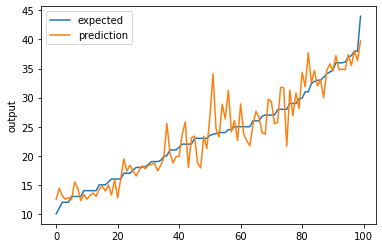

<Figure size 432x288 with 0 Axes>

In [27]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
import os
import pandas as pd
import numpy as np
from scipy.stats import zscore
import matplotlib.pyplot as plt

df3 = pd.read_csv(
    "https://data.heatonresearch.com/data/t81-558/auto-mpg.csv", 
    na_values=['NA', '?'])
print(f"horsepower has na? {pd.isnull(df3['horsepower']).values.any()}")
    
print("Filling missing values...")
med = df3['horsepower'].median()
df3['horsepower'] = df3['horsepower'].fillna(med)
                
print(f"horsepower has na? {pd.isnull(df3['horsepower']).values.any()}")
display(df3)


df3['weight_zscore'] = zscore(df3['weight'])
df3.drop('weight', axis=1, inplace=True)
df3['cylinders_zscore'] = zscore(df3['cylinders'])
df3.drop('cylinders', axis=1, inplace=True)
df3['displacement_zscore'] = zscore(df3['displacement'])
df3.drop('displacement', axis=1, inplace=True)
df3['horsepower_zscore'] = zscore(df3['horsepower'])
df3.drop('horsepower', axis=1, inplace=True)
df3['acceleration_zscore'] = zscore(df3['acceleration'])
df3.drop('acceleration', axis=1, inplace=True)
df3['year_zscore'] = zscore(df3['year'])
df3.drop('year', axis=1, inplace=True)


def get_first_word(x):
    words = x.split()
    return words[0]

dummies = pd.get_dummies(df3['origin'],prefix='origin')
df3 = pd.concat([df3,dummies],axis=1)
df3.drop('origin',axis=1, inplace=True)

# df3['name']=df3['name'].apply(get_first_word)
# dummies = pd.get_dummies(df3['name'],prefix='name')
# df3 = pd.concat([df3,dummies],axis=1)
df3.drop('name',axis=1, inplace=True)
display(df3)

# Convert to numpy - Classification
x3_columns = df3.columns.drop('mpg')
x3 = df3[x3_columns].values
y3 = df3['mpg'].values
print("df3.shape=",df3.shape)
print("x3.shape=",x3.shape)
print("y3.shape=",y3.shape)
# Create train/test
x3_train, x3_test, y3_train, y3_test = train_test_split(    
    x3, y3, test_size=0.25, random_state=42)
print("x3_train.shape=",x3_train.shape)
print("x3_test.shape=",x3_test.shape)


# Build the neural network
model = Sequential()
model.add(Dense(25, input_dim=x3.shape[1], activation='relu')) # Hidden 1
model.add(Dense(10, activation='relu')) # Hidden 2
model.add(Dense(1)) # Output
model.compile(loss='mean_squared_error', optimizer='adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, 
                        patience=5, verbose=1, mode='auto', 
                        restore_best_weights=True)
model.fit(x3_train,y3_train,validation_data=(x3_test,y3_test),
          callbacks=[monitor],verbose=2,epochs=1000)

from sklearn import metrics

# Predict
pred3 = model.predict(x3_test)

# Measure MSE error.  
score = metrics.mean_squared_error(pred3,y3_test)
print("Final score (MSE): {}".format(score))

# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(pred3,y3_test))
print("Final score (RMSE): {}".format(score))

def chart_regression(pred, y, sort=True):
    t = pd.DataFrame({'pred': pred, 'y': y.flatten()})
    if sort:
        t.sort_values(by=['y'], inplace=True)
    plt.plot(t['y'].tolist(), label='expected')
    plt.plot(t['pred'].tolist(), label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.figure()

chart_regression(pred3.flatten(),y3_test)




In [28]:
# PCA降维至15维

horsepower has na? True
Filling missing values...
horsepower has na? False


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


,mpg,weight_zscore,cylinders_zscore,displacement_zscore,horsepower_zscore,acceleration_zscore,year_zscore,origin_1,origin_2,origin_3,...,name_renault,name_saab,name_subaru,name_toyota,name_toyouta,name_triumph,name_vokswagen,name_volkswagen,name_volvo,name_vw
0,18.0,0.630870,1.498191,1.090604,0.673118,-1.295498,-1.627426,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,15.0,0.854333,1.498191,1.503514,1.589958,-1.477038,-1.627426,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,18.0,0.550470,1.498191,1.196232,1.197027,-1.658577,-1.627426,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,16.0,0.546923,1.498191,1.061796,1.197027,-1.295498,-1.627426,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17.0,0.565841,1.498191,1.042591,0.935072,-1.840117,-1.627426,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,-0.213324,-0.856321,-0.513026,-0.479482,0.011586,1.621983,1,0,0,...,0,0,0,0,0,0,0,0,0,0
394,44.0,-0.993671,-0.856321,-0.925936,-1.370127,3.279296,1.621983,0,1,0,...,0,0,0,0,0,0,0,0,0,1
395,32.0,-0.798585,-0.856321,-0.561039,-0.531873,-1.440730,1.621983,1,0,0,...,0,0,0,0,0,0,0,0,0,0
396,28.0,-0.408411,-0.856321,-0.705077,-0.662850,1.100822,1.621983,1,0,0,...,0,0,0,0,0,0,0,0,0,0


df3.shape= (398, 47)
x3.shape= (398, 46)
y3.shape= (398,)
type(pca_fit)= <class 'sklearn.decomposition._pca.PCA'>
pca_fit.components_.shape= (46, 46)
x3.shape= (398, 15)
x3_train.shape= (298, 15)
x3_test.shape= (100, 15)
Train on 298 samples, validate on 100 samples
Epoch 1/1000
298/298 - 1s - loss: 609.7808 - val_loss: 595.3593
Epoch 2/1000
298/298 - 0s - loss: 601.2474 - val_loss: 586.0960
Epoch 3/1000
298/298 - 0s - loss: 592.0806 - val_loss: 576.2011
Epoch 4/1000
298/298 - 0s - loss: 581.9737 - val_loss: 565.2818
Epoch 5/1000
298/298 - 0s - loss: 570.7411 - val_loss: 553.0008
Epoch 6/1000
298/298 - 0s - loss: 558.1722 - val_loss: 539.2651
Epoch 7/1000
298/298 - 0s - loss: 543.9605 - val_loss: 524.2519
Epoch 8/1000
298/298 - 0s - loss: 528.6840 - val_loss: 507.1673
Epoch 9/1000
298/298 - 0s - loss: 510.8697 - val_loss: 488.1964
Epoch 10/1000
298/298 - 0s - loss: 491.0333 - val_loss: 466.6599
Epoch 11/1000
298/298 - 0s - loss: 468.2345 - val_loss: 442.0492
Epoch 12/1000
298/298 - 0s 

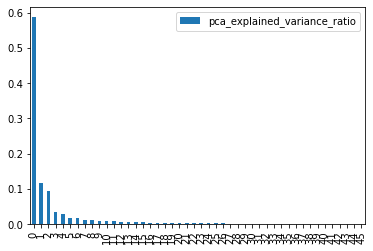

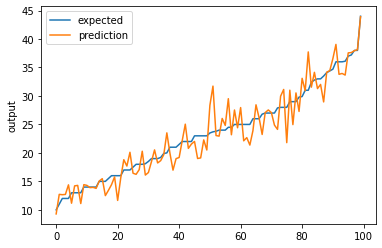

<Figure size 432x288 with 0 Axes>

In [66]:
from sklearn.model_selection import train_test_split
from sklearn import decomposition
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
import os
import pandas as pd
import numpy as np
from scipy.stats import zscore
import matplotlib.pyplot as plt

df3 = pd.read_csv(
    "https://data.heatonresearch.com/data/t81-558/auto-mpg.csv", 
    na_values=['NA', '?'])
print(f"horsepower has na? {pd.isnull(df3['horsepower']).values.any()}")
    
print("Filling missing values...")
med = df3['horsepower'].median()
df3['horsepower'] = df3['horsepower'].fillna(med)
                
print(f"horsepower has na? {pd.isnull(df3['horsepower']).values.any()}")
display(df3)


df3['weight_zscore'] = zscore(df3['weight'])
df3.drop('weight', axis=1, inplace=True)
df3['cylinders_zscore'] = zscore(df3['cylinders'])
df3.drop('cylinders', axis=1, inplace=True)
df3['displacement_zscore'] = zscore(df3['displacement'])
df3.drop('displacement', axis=1, inplace=True)
df3['horsepower_zscore'] = zscore(df3['horsepower'])
df3.drop('horsepower', axis=1, inplace=True)
df3['acceleration_zscore'] = zscore(df3['acceleration'])
df3.drop('acceleration', axis=1, inplace=True)
df3['year_zscore'] = zscore(df3['year'])
df3.drop('year', axis=1, inplace=True)


def get_first_word(x):
    words = x.split()
    return words[0]

dummies = pd.get_dummies(df3['origin'],prefix='origin')
df3 = pd.concat([df3,dummies],axis=1)
df3.drop('origin',axis=1, inplace=True)

df3['name']=df3['name'].apply(get_first_word)
dummies = pd.get_dummies(df3['name'],prefix='name')
df3 = pd.concat([df3,dummies],axis=1)
df3.drop('name',axis=1, inplace=True)
display(df3)

# Convert to numpy - Classification
x3_columns = df3.columns.drop('mpg')
x3 = df3[x3_columns].values
y3 = df3['mpg'].values
print("df3.shape=",df3.shape)
print("x3.shape=",x3.shape)
print("y3.shape=",y3.shape)

# PCA
pca = decomposition.PCA()
pca_fit = pca.fit(x3)
print('type(pca_fit)=',type(pca_fit))
print('pca_fit.components_.shape=', pca_fit.components_.shape)
# print('pca_fit.explained_variance_ratio_=', pca_fit.explained_variance_ratio_)

pca_evr = pd.DataFrame(pca_fit.explained_variance_ratio_)
pca_evr.rename(columns={0:'pca_explained_variance_ratio'},inplace=True)
pca_evr.plot(kind='bar')
plt.figure()



pca2 = decomposition.PCA(n_components=15)
x3 = pca2.fit_transform(x3)
print('x3.shape=',x3.shape)


# Create train/test
x3_train, x3_test, y3_train, y3_test = train_test_split(    
    x3, y3, test_size=0.25, random_state=42)
print("x3_train.shape=",x3_train.shape)
print("x3_test.shape=",x3_test.shape)


# Build the neural network
model = Sequential()
model.add(Dense(25, input_dim=x3.shape[1], activation='relu')) # Hidden 1
model.add(Dense(10, activation='relu')) # Hidden 2
model.add(Dense(1)) # Output
model.compile(loss='mean_squared_error', optimizer='adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, 
                        patience=5, verbose=1, mode='auto', 
                        restore_best_weights=True)
model.fit(x3_train,y3_train,validation_data=(x3_test,y3_test),
          callbacks=[monitor],verbose=2,epochs=1000)

from sklearn import metrics

# Predict
pred3 = model.predict(x3_test)

# Measure MSE error.  
score = metrics.mean_squared_error(pred3,y3_test)
print("Final score (MSE): {}".format(score))

# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(pred3,y3_test))
print("Final score (RMSE): {}".format(score))

def chart_regression(pred, y, sort=True):
    t = pd.DataFrame({'pred': pred, 'y': y.flatten()})
    if sort:
        t.sort_values(by=['y'], inplace=True)
    plt.plot(t['y'].tolist(), label='expected')
    plt.plot(t['pred'].tolist(), label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.figure()

chart_regression(pred3.flatten(),y3_test)




# PCA Iris Demo

<class 'sklearn.utils.Bunch'>
iris.data.shape= (150, 4)
iris.target.shape= (150,)
type(X)= <class 'numpy.ndarray'>
X.shape= (150, 3)


/Users/thomashuang/opt/miniconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.


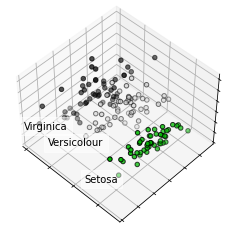

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


from sklearn import decomposition
from sklearn import datasets

np.random.seed(5)

centers = [[1, 1], [-1, -1], [1, -1]]
iris = datasets.load_iris()

print(type(iris))
print('iris.data.shape=', iris.data.shape)
# display(iris.data)
print('iris.target.shape=', iris.target.shape)
# print(iris.target)

X = iris.data
y = iris.target

fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
pca = decomposition.PCA(n_components=3)
fit = pca.fit(X)
X = pca.transform(X)
print('type(X)=',type(X))
print('X.shape=', X.shape)


for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral,
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()